In [36]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import numpy as np
import matplotlib.pyplot as plt
%aimport Prebreakdown
import Util
from scipy.special import j0, jn_zeros

In [38]:
r_max = 2e-3; z_max = 1e-3

V_bottom = Util.bessel_boundary(-500,1e-3)
V_top = Util.bessel_boundary(500,1e-3)
n_bottom = Util.gaussian_boundary(1e19,1e-4 / (np.sqrt(2*np.log(2)))) #HWHM of 1e-4

In [39]:
N_z = 50; N_r = 50
Dz = z_max / N_z; Dr = r_max / N_r

In [40]:
Dz

2e-05

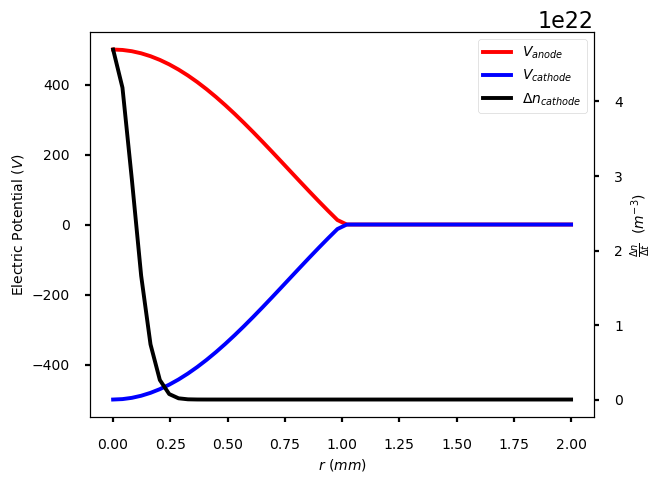

In [41]:
r = np.linspace(0,r_max,N_r)
plt.style.use('seaborn-v0_8-poster')

fig, ax1 = plt.subplots(figsize=(6.5,5))

ax2 = ax1.twinx()

line1, = ax1.plot(r*1e3, np.array([V_top(r_i,0) for r_i in r]), color='red', label=r'$V_{anode}$')
line2, = ax1.plot(r*1e3, np.array([V_bottom(r_i,0) for r_i in r]), color='blue',label=r'$V_{cathode}$')
line3, = ax2.plot(r*1e3, np.array([n_bottom(r_i,0) for r_i in r]), color='black',label=r'$\Delta n_{cathode}$')

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

ax1.legend([line1,line2,line3],[r'$V_{anode}$',r'$V_{cathode}$',r'$\Delta n_{cathode}$'],fontsize=10)

ax1.set_ylabel(r'Electric Potential $(V)$',fontsize=10)
ax2.set_ylabel(r'$\frac{\Delta n}{\Delta t}$  $(m^{-3})$',fontsize=10)
ax1.set_xlabel(r'$r$ $(mm)$',fontsize=10)

fig.savefig('Boundary_Conditions.jpg')

In [52]:
p = Prebreakdown.Prebreakdown(N_z,N_r,Dz,Dr,V_top=V_top,V_bottom=V_bottom,nu=1e10,
                              n_bottom=n_bottom,u_z_bottom=lambda r,t : 1e5,
                              save_dir='10x10_1e-4')

/Users/cphys/Desktop/l_keeley/Prebreakdown_Dynamics/Prebreakdown.py:98: RuntimeWarning: divide by zero encountered in divide
  s.c = (s.rr + s.dr / 2) / s.rr; s.d = (s.rr - s.dr / 2) / s.rr


In [53]:
p.sor(sp_r=0.97,iterations=1000000,EPS=1e-13)

Error reduced by factor of 1e-13 in 1483 iterations and anorm = 5.84767893829774e-09


True

In [57]:
for _ in range(100):
    p.step(method='Fluid',smooth=True,smooth_sigma=1/2,save_every=100000,substeps=100,resolve_pot_every=10)

target_dt: 1.539708174644853e-14
Old dt: 1.5418996769465172e-14, ratio: 0.9985786998113884
Time step limited to: 1.5408035361709198e-14 at time: 2.14852212905093e-11
Step took: 1.0105173587799072
target_dt: 1.507026213629413e-14
Old dt: 1.5090203807244346e-14, ratio: 0.9986785022121011
Time step limited to: 1.5080229675481604e-14 at time: 2.2247179595187232e-11
Step took: 1.0438969135284424
target_dt: 1.4775130864495836e-14
Old dt: 1.479338464022386e-14, ratio: 0.9987660852352618
Time step limited to: 1.4784254935171072e-14 at time: 2.2993574240108516e-11
Step took: 1.0254769325256348
target_dt: 1.4507147040296456e-14
Old dt: 1.452394503248693e-14, ratio: 0.9988434277220892
Time step limited to: 1.4515543606474792e-14 at time: 2.372587726137796e-11
Step took: 0.9968361854553223
target_dt: 1.426260445511353e-14
Old dt: 1.427813737434246e-14, ratio: 0.9989121186593397
Time step limited to: 1.4270368801331653e-14 at time: 2.4445354482067684e-11
Step took: 1.057807207107544
target_dt: 1.40

KeyboardInterrupt: 

0